In [19]:
# loading necessary packages
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from scipy import signal
from statsmodels.tsa.seasonal import STL

In [20]:
# Read Daily Temperature min-max time series data
path = "C:\Python\Anomaly-Detection-Notes\data\daily-min-temperatures.txt"
data = pd.read_csv(path, sep = ",", header = 0)    

In [21]:
# Show first several line of data
data.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


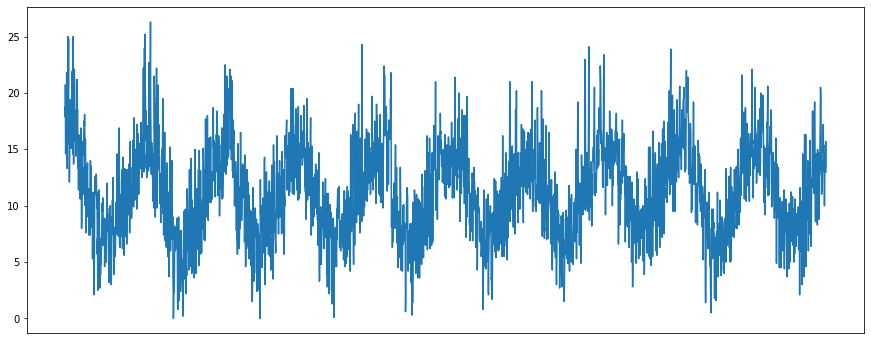

In [22]:
# Plot time series
plt.rcParams['figure.figsize'] = [15, 6]
plt.plot(data.Date, data.Temp)
plt.xticks([])
plt.show()

In [23]:
# Convert data format and output data information
dataTemp = pd.Series(data.Temp.values, index=pd.date_range(start='1981-1-1', periods=len(data.Temp), freq = "D"), name = 'Temp')
dataTemp.describe()

count    3650.000000
mean       11.177753
std         4.071837
min         0.000000
25%         8.300000
50%        11.000000
75%        14.000000
max        26.300000
Name: Temp, dtype: float64

[1.66454208e+09 6.63660270e+05 6.05381713e+04 ... 1.84667295e+05
 6.05381713e+04 6.63660270e+05]
182.4
0.005482456140350877


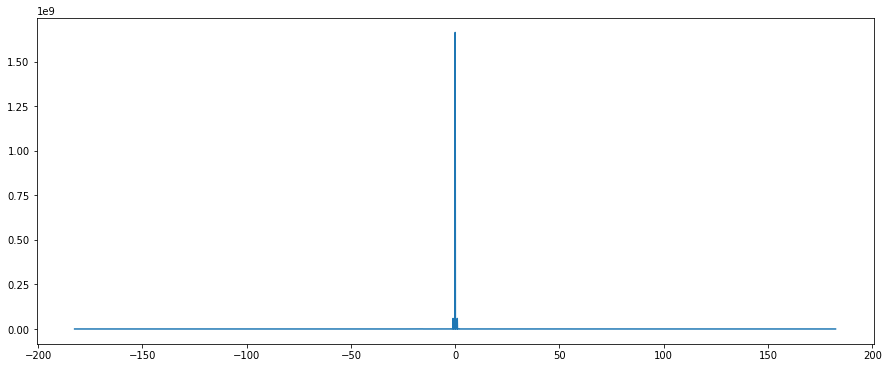

In [24]:
time_step = 1 / 365
freqs = np.fft.fftfreq(3650, time_step)
idx = np.argsort(freqs)
ps = np.abs(np.fft.fft(dataTemp))**2
print(ps)
plt.plot(freqs[idx], ps[idx])
print(max(freqs))
period = 1/max(freqs)
print(period)

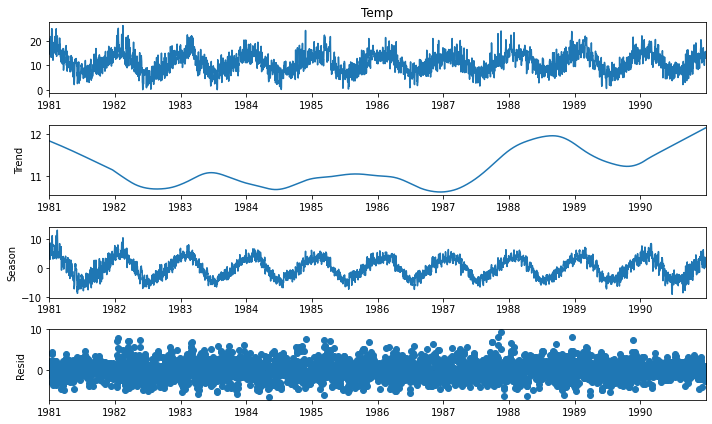

In [26]:
# Now Perform Seasonal-Trend decomposition using LOESS (STL)
plt.rcParams['figure.figsize'] = [10, 6]
stl = STL(dataTemp, period = 365)
res = stl.fit()
fig = res.plot()

STL successfully decomposed the temperature data into three different components. First component is trend (lowest frequency) + 
Seasonal component(mid range frequencies) + residuals(high frequencie)

Now what we are going to do is to plot the predicted time series based on our decomposition: Trend + Season

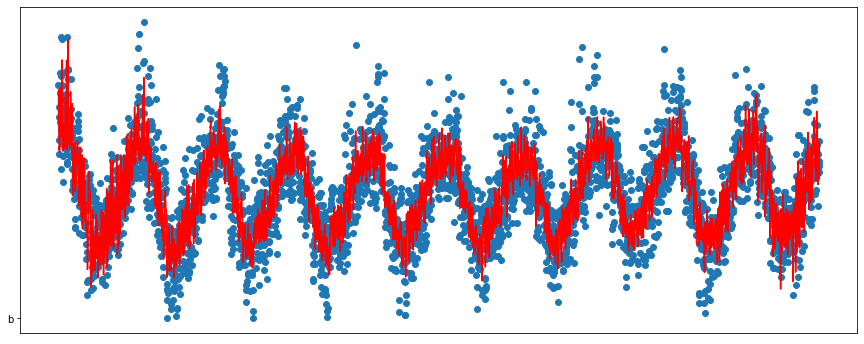

In [27]:
plt.rcParams['figure.figsize'] = [15, 6]
plt.plot(data.Date, data.Temp,"o","b")
plt.plot(data.Date, res.seasonal + res.trend,"r")
plt.xticks([])
plt.show()

Red line is the prediction result based on STL (trend + seasonal effect) while blue line is the original data. Now let us compute the mean and the variance of the residual.

In [56]:
residualMean = np.mean(res.resid)
residualVar = np.var(res.resid)
UpperLimit = residualMean + 3*np.sqrt(residualVar)
LowerLimit = residualMean - 3*np.sqrt(residualVar)

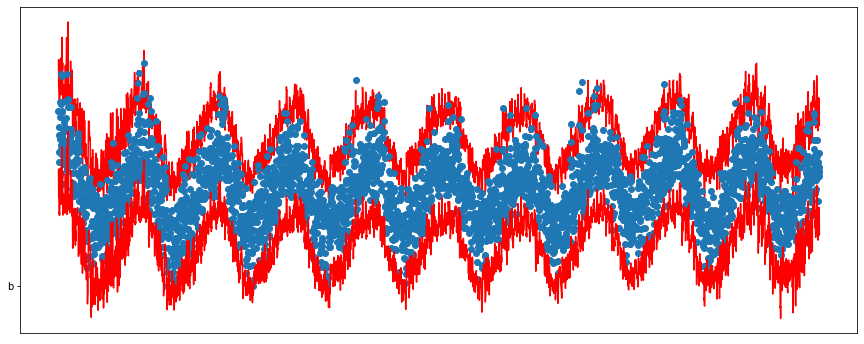

In [59]:
plt.rcParams['figure.figsize'] = [15, 6]
plt.plot(data.Date, res.seasonal + res.trend + UpperLimit,"r")
plt.plot(data.Date, data.Temp,"o","b")
plt.plot(data.Date, res.seasonal + res.trend + LowerLimit,"r")
plt.xticks([])
plt.show()

The blue dots that are outside the red line range will be counted as abnormal points

In [61]:
# Things to be done:
# (1) Spectrum Analysis to determine the frequency used by STL
# (2) Review the Anomaly detection process and validate my procedures.